# 2024-2 언어데이터과학 9강 (2024-10-12) 다양한 빈도 개념

이 `ipynb` 파일은 GitHub 리포지토리의 `LDS2024/notes` 폴더 안에 들어있어야 한다.

## 예시: 동요 코퍼스

아래와 같이 10개의 동요 가사로 이루어진 코퍼스가 있다.

모든 텍스트는 형태소 분석이 완료되었다고 가정한다.

일반적으로 코퍼스는 문서들의 리스트로 표현되고, 각 문서는 단어 혹은 형태소의 리스트로 표현된다.

즉, 코퍼스는 [[단어들의 리스트]로 이루어진 리스트]로 표현할 수 있다.

In [2]:
corpus = [
    "반짝 반짝 작 은 별 아름답 게 비치 네 동쪽 하늘 에서 도 서쪽 하늘 에서 도".split(), # 형태소들의 리스트
    "햇볕 은 쨍쨍 모래알 은 반짝 모래알 로 밥 을 짓 고 조약돌 로 소반 놓 아".split(),
    "파란 하늘 파란 하늘 꿈 이 드리우 은 작 은 언덕 에 아기 염소 여럿 이 풀 을 뜯 고 놀 아요".split(),
    "깊 은 산 속 옹달샘 누가 와 서 먹 나요 맑 고 맑 은 옹달샘 누가 와서 먹 나요".split(),
    "산 토끼 토끼 야 어디 로 가 느냐 깡충 깡충 뛰 면서 어디 로 가 느냐".split(),
    "곰 세 마리 가 한 집 에 있 어 아빠 곰 엄마 곰 아기 곰".split(),
    "나비 야 나비 야 이리 날아오 너라 노랑 나비 흰 나비 춤 을 추 며 오 너라".split(),
    "산 위 에서 부 는 바람 시원하 은 바람 그 바람 은 좋 은 바람 고맙 은 바람".split(),
    "루돌프 사슴 코 는 매우 반짝 이 는 코 만일 네 가 보 았 다면 불 붙 는다 하 였 겠 지".split(),
    "푸르 은 하늘 은하수 하얗 은 쪽배 에 계수 나무 한 나무 토끼 한 마리".split(),
]

### 코퍼스 기초 통계량: 문서 개수, 토큰 개수, 타입 개수

코퍼스에 관해 기술할 때는 코퍼스의 규모를 설명해야 한다.

코퍼스의 규모는 크게 문서 개수($N_\text{doc}$), 토큰 개수($N$), 타입 개수($|V|$) 세 가지로 표현한다.

타입의 목록을 Vocabulary라고 한다.

In [3]:
# 문서 개수
print('Number of documents:' , len(corpus))

# 토큰: 중복된 출현을 모두 센 단어 목록
tokens = sorted([word for document in corpus for word in document])
print('Number of tokens:' , len(tokens))

# 타입: 중복된 출현을 제거한 단어 목록
vocab = sorted(list(set(tokens)))
print('Number of types:' , len(vocab))

print('Token list:', tokens)
print('Vocabulary:', vocab)

Number of documents: 10
Number of tokens: 178
Number of types: 105
Token list: ['가', '가', '가', '가', '게', '겠', '계수', '고', '고', '고', '고맙', '곰', '곰', '곰', '곰', '그', '깊', '깡충', '깡충', '꿈', '나무', '나무', '나비', '나비', '나비', '나비', '나요', '나요', '날아오', '너라', '너라', '네', '네', '노랑', '놀', '놓', '누가', '누가', '느냐', '느냐', '는', '는', '는', '는다', '다면', '도', '도', '동쪽', '드리우', '뛰', '뜯', '로', '로', '로', '로', '루돌프', '마리', '마리', '만일', '맑', '맑', '매우', '먹', '먹', '며', '면서', '모래알', '모래알', '바람', '바람', '바람', '바람', '바람', '반짝', '반짝', '반짝', '반짝', '밥', '별', '보', '부', '불', '붙', '비치', '사슴', '산', '산', '산', '서', '서쪽', '세', '소반', '속', '시원하', '아', '아기', '아기', '아름답', '아빠', '아요', '았', '야', '야', '야', '어', '어디', '어디', '언덕', '엄마', '에', '에', '에', '에서', '에서', '에서', '여럿', '염소', '였', '오', '옹달샘', '옹달샘', '와', '와서', '위', '은', '은', '은', '은', '은', '은', '은', '은', '은', '은', '은', '은', '은', '은하수', '을', '을', '을', '이', '이', '이', '이리', '있', '작', '작', '조약돌', '좋', '지', '집', '짓', '쨍쨍', '쪽배', '추', '춤', '코', '코', '토끼', '토끼', '토끼', '파란', '파란', '푸르', '풀', '하', 

### 토큰 빈도(token frequency)

각 단어의 토큰이 주어진 코퍼스 내에서 몇 번 출현했는지를 세어 보자.

토큰 빈도가 높은 순서대로 정렬하면 ‘은’의 토큰 빈도는 13, ‘하늘’의 토큰 빈도는 5이고, 뒤로 가 보면 토큰 빈도가 1인 단어들이 매우 많음을 알 수 있다.

In [4]:
# token frequency
from collections import Counter

counter = Counter([token for doc in corpus for token in doc])
print(counter)

Counter({'은': 13, '하늘': 5, '바람': 5, '반짝': 4, '로': 4, '가': 4, '곰': 4, '나비': 4, '에서': 3, '을': 3, '고': 3, '이': 3, '에': 3, '산': 3, '토끼': 3, '야': 3, '한': 3, '는': 3, '작': 2, '네': 2, '도': 2, '모래알': 2, '파란': 2, '아기': 2, '옹달샘': 2, '누가': 2, '먹': 2, '나요': 2, '맑': 2, '어디': 2, '느냐': 2, '깡충': 2, '마리': 2, '너라': 2, '코': 2, '나무': 2, '별': 1, '아름답': 1, '게': 1, '비치': 1, '동쪽': 1, '서쪽': 1, '햇볕': 1, '쨍쨍': 1, '밥': 1, '짓': 1, '조약돌': 1, '소반': 1, '놓': 1, '아': 1, '꿈': 1, '드리우': 1, '언덕': 1, '염소': 1, '여럿': 1, '풀': 1, '뜯': 1, '놀': 1, '아요': 1, '깊': 1, '속': 1, '와': 1, '서': 1, '와서': 1, '뛰': 1, '면서': 1, '세': 1, '집': 1, '있': 1, '어': 1, '아빠': 1, '엄마': 1, '이리': 1, '날아오': 1, '노랑': 1, '흰': 1, '춤': 1, '추': 1, '며': 1, '오': 1, '위': 1, '부': 1, '시원하': 1, '그': 1, '좋': 1, '고맙': 1, '루돌프': 1, '사슴': 1, '매우': 1, '만일': 1, '보': 1, '았': 1, '다면': 1, '불': 1, '붙': 1, '는다': 1, '하': 1, '였': 1, '겠': 1, '지': 1, '푸르': 1, '은하수': 1, '하얗': 1, '쪽배': 1, '계수': 1})


### 지프의 법칙(Zipf's Law)

지프의 법칙의 내용은 단어를 빈도 내림차순으로 정렬했을 때 정렬된 순위와 빈도 사이에 반비례관계가 성립한다는 것이다.

위에서 구한 각 단어의 토큰 빈도를 $y$축에, 순위를 $x$축에 그려 보면 아래 그림과 같이 반비례 곡선에 가까운 그래프가 나온다.

<Axes: >

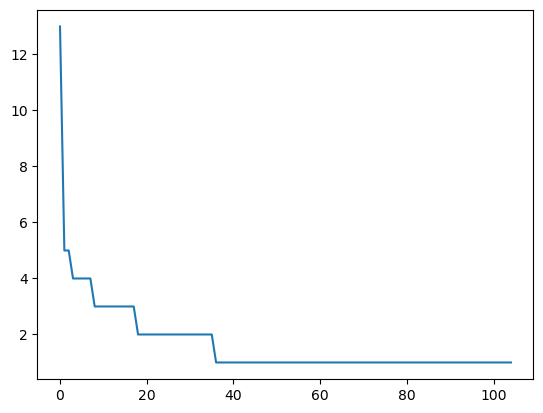

In [5]:
# Zipf's law
import pandas as pd

freq = pd.DataFrame(counter.most_common(), columns=['word', 'token_freq'])
freq['token_freq'].plot()

### 문서 빈도(document frequency)

다음으로 단어의 문서 빈도를 계산해 보자.

문서 빈도는 주어진 단어가 코퍼스 내에서 몇 개 문서에 포함되었는지를 뜻한다.

In [6]:
# document frequency

def get_df(term, corpus=corpus):
    return sum(1 for doc in corpus if term in doc)

freq['doc_freq'] = freq['word'].apply(get_df)
freq

,word,token_freq,doc_freq
0,은,13,6
1,하늘,5,3
2,바람,5,1
3,반짝,4,3
4,로,4,2
...,...,...,...
100,푸르,1,1
101,은하수,1,1
102,하얗,1,1
103,쪽배,1,1


토큰 빈도와 문서 빈도의 관계를 산점도로 살펴보자.

빈도의 정의상 단어의 문서 빈도 값은 토큰 빈도의 값을 초과할 수 없다.

따라서 토큰 빈도를 $x$축에, 문서 빈도를 $y$축에 나타내었을 때 모든 점은 $y=x$ 직선상에 존재하거나 그보다 아래 영역에 존재한다.

<Axes: xlabel='token_freq', ylabel='doc_freq'>

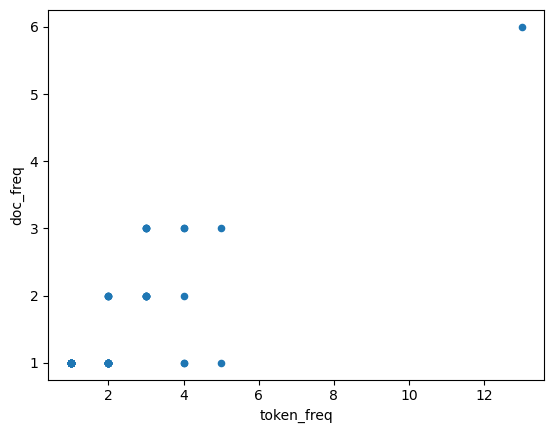

In [7]:
freq.plot.scatter(x='token_freq', y='doc_freq')

## Apicius, _De re coquinaria_

### 단어 분리(word tokenization)

이제 3–4강에서 다룬 Apicius의 _De re coquinaria_ 문헌 영역본에 출현한 단어의 빈도를 세어 보자.

우리가 가지고 있는 데이터는 raw text이기 때문에, 파이썬에서 사용하기 위해서는 문자열을 단어의 리스트로 변환해 주어야 한다.

일반적으로 문자열을 공백 문자 기준으로 분리해 주면 단어들의 리스트가 되지만, 실제로는 문장 부호 등의 문제로 인해 더 복잡하다.

`NLTK` 라이브러리의 `nltk.tokenize` 모듈에 들어 있는 `word_tokenize()` 함수를 사용하면 영어 텍스트를 단어의 리스트로 분리할 수 있다.

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sentence = '"Twinkle, twinkle, little star..."'
words = word_tokenize(sentence)
print(words)
print(Counter(words))

['``', 'Twinkle', ',', 'twinkle', ',', 'little', 'star', '...', "''"]
Counter({',': 2, '``': 1, 'Twinkle': 1, 'twinkle': 1, 'little': 1, 'star': 1, '...': 1, "''": 1})


[nltk_data] Downloading package punkt to /Users/t/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


`word_tokenize()` 함수를 적용했을 때 따옴표, 쉼표 등의 문장 부호가 모두 별개의 단어로 분리된 것을 확인할 수 있다.

### 품사 태깅(Part-of-speech tagging)

`NLTK` 라이브러리에는 영어 단어들의 리스트를 받아 품사 태깅을 해 주는 `pos_tag()` 함수도 있다.

위에서 사용한 예시에 적용해 보면, 아래와 같이 ``(여는따옴표), NNP(고유명사), ,(쉼표), NN(일반명사), JJ(형용사) 등의 태그가 단어마다 붙은 것을 확인할 수 있다.

In [9]:
# POS tagging
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

print(pos_tag(words))

[('``', '``'), ('Twinkle', 'NNP'), (',', ','), ('twinkle', 'NN'), (',', ','), ('little', 'JJ'), ('star', 'NN'), ('...', ':'), ("''", "''")]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/t/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 코퍼스 읽기

이제 _De re coquinaria_ 텍스트에 단어 분리와 품사 태그를 적용한 뒤 토큰 빈도 등을 세어보자.

아래 링크에서 CSV 파일을 다운로드하여 자신의 `LDS2024/data/apicius` 폴더로 복사한다.

https://github.com/suparklingmin/LingDataSci2024/blob/main/data/apicius/apicius-corpus.csv

In [10]:
corpus = pd.read_csv('../data/apicius/apicius-corpus.csv', index_col='docid')
corpus

,title,text,book,book_title,chapter_number,chapter_title
docid,,,,,,
1,FINE SPICED WINE,the composition of [this] excellent spiced win...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.
2,HONEY REFRESHER FOR TRAVELERS,the wayfarer's honey refresher (so called beca...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.
3,ROMAN VERMOUTH,roman vermouth [or absinth] is made thus: acco...,I,THE CAREFUL EXPERIENCED COOK,II,ROMAN VERMOUTH.
4,ROSE WINE,"make rose wine in this manner: rose petals, th...",I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.
5,VIOLET WINE,in a similar way as above like the rose wine v...,I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.
...,...,...,...,...,...,...
495,PLAIN LAMB,of the skinned lamb make small cutlets which w...,NaN,SUMMARY OF DISHES,XXVII,PLAIN LAMB
496,KID WITH LASER,the well-cleaned guts of a kid fill with [a pr...,NaN,SUMMARY OF DISHES,XXVIII,KID AND LASER
497,"THRUSH ""À LA SANTÉ""","crush pepper, laser, laurel berry, mix in cumi...",NaN,SUMMARY OF DISHES,XXIX,"THRUSH, HEALTH STYLE"


CSV 파일을 데이터프레임으로 읽어 보면 `'text'` 열에 각 문서(레시피)의 본문이 들어 있다.

여기에 `word_tokenize()` 함수와 `pos_tag()` 함수를 적용한 결과를 `'tags'`라는 새로운 열로 저장한다.

In [11]:
corpus.fillna('', inplace=True)
corpus['tags'] = corpus['text'].apply(lambda x: pos_tag(word_tokenize(x)))
corpus

,title,text,book,book_title,chapter_number,chapter_title,tags
docid,,,,,,,
1,FINE SPICED WINE,the composition of [this] excellent spiced win...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.,"[(the, DT), (composition, NN), (of, IN), ([, N..."
2,HONEY REFRESHER FOR TRAVELERS,the wayfarer's honey refresher (so called beca...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.,"[(the, DT), (wayfarer, NN), ('s, POS), (honey,..."
3,ROMAN VERMOUTH,roman vermouth [or absinth] is made thus: acco...,I,THE CAREFUL EXPERIENCED COOK,II,ROMAN VERMOUTH.,"[(roman, NN), (vermouth, NN), ([, NN), (or, CC..."
4,ROSE WINE,"make rose wine in this manner: rose petals, th...",I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.,"[(make, NN), (rose, VBD), (wine, NN), (in, IN)..."
5,VIOLET WINE,in a similar way as above like the rose wine v...,I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.,"[(in, IN), (a, DT), (similar, JJ), (way, NN), ..."
...,...,...,...,...,...,...,...
495,PLAIN LAMB,of the skinned lamb make small cutlets which w...,,SUMMARY OF DISHES,XXVII,PLAIN LAMB,"[(of, IN), (the, DT), (skinned, JJ), (lamb, NN..."
496,KID WITH LASER,the well-cleaned guts of a kid fill with [a pr...,,SUMMARY OF DISHES,XXVIII,KID AND LASER,"[(the, DT), (well-cleaned, JJ), (guts, NNS), (..."
497,"THRUSH ""À LA SANTÉ""","crush pepper, laser, laurel berry, mix in cumi...",,SUMMARY OF DISHES,XXIX,"THRUSH, HEALTH STYLE","[(crush, NN), (pepper, NN), (,, ,), (laser, NN..."


### 단어 빈도(term frequency)

`'tags'` 열의 각 값에 `Counter()`를 취해 주면 각 문서(레시피)에 어떤 단어가 몇 번 쓰였는지를 알 수 있다.

여기서 센 것은 단어 빈도(term frequency)라고 한다.

> 토큰 빈도(token frequency)는 코퍼스 전체에서 출현한 횟수를 말하고, 단어 빈도(term frequency)는 코퍼스 내의 하나의 문서에 출현한 횟수를 말한다.
> 
> 단어 빈도는 하나의 코퍼스가 여러 개의 문서로 이루어져 있다는 것을 전제하지만, 토큰 빈도에는 그런 전제가 없다는 데 유의하자.
> 
> 단어 빈도는 토큰 빈도와 함께 사용되기보다는 문서 빈도와 결합하여 TF-IDF(Term frequency - Inverse document frequency)라는 가중치를 만드는 데 활용된다.
> 
> TF-IDF에 관해서는 학기말에 단어 임베딩을 공부할 때 자세히 배울 것이다.

각 문서의 단어 빈도 카운터를 `'term_freq'`라는 새로운 열로 저장한다.

In [12]:
# term frequency
corpus['term_freq'] = corpus['tags'].apply(Counter)
corpus

,title,text,book,book_title,chapter_number,chapter_title,tags,term_freq
docid,,,,,,,,
1,FINE SPICED WINE,the composition of [this] excellent spiced win...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.,"[(the, DT), (composition, NN), (of, IN), ([, N...","{('the', 'DT'): 6, ('composition', 'NN'): 1, (..."
2,HONEY REFRESHER FOR TRAVELERS,the wayfarer's honey refresher (so called beca...,I,THE CAREFUL EXPERIENCED COOK,I,FINE SPICED WINE.,"[(the, DT), (wayfarer, NN), ('s, POS), (honey,...","{('the', 'DT'): 6, ('wayfarer', 'NN'): 1, (''s..."
3,ROMAN VERMOUTH,roman vermouth [or absinth] is made thus: acco...,I,THE CAREFUL EXPERIENCED COOK,II,ROMAN VERMOUTH.,"[(roman, NN), (vermouth, NN), ([, NN), (or, CC...","{('roman', 'NN'): 1, ('vermouth', 'NN'): 2, ('..."
4,ROSE WINE,"make rose wine in this manner: rose petals, th...",I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.,"[(make, NN), (rose, VBD), (wine, NN), (in, IN)...","{('make', 'NN'): 1, ('rose', 'VBD'): 2, ('wine..."
5,VIOLET WINE,in a similar way as above like the rose wine v...,I,THE CAREFUL EXPERIENCED COOK,III,ROSE WINE.,"[(in, IN), (a, DT), (similar, JJ), (way, NN), ...","{('in', 'IN'): 1, ('a', 'DT'): 1, ('similar', ..."
...,...,...,...,...,...,...,...,...
495,PLAIN LAMB,of the skinned lamb make small cutlets which w...,,SUMMARY OF DISHES,XXVII,PLAIN LAMB,"[(of, IN), (the, DT), (skinned, JJ), (lamb, NN...","{('of', 'IN'): 1, ('the', 'DT'): 2, ('skinned'..."
496,KID WITH LASER,the well-cleaned guts of a kid fill with [a pr...,,SUMMARY OF DISHES,XXVIII,KID AND LASER,"[(the, DT), (well-cleaned, JJ), (guts, NNS), (...","{('the', 'DT'): 6, ('well-cleaned', 'JJ'): 1, ..."
497,"THRUSH ""À LA SANTÉ""","crush pepper, laser, laurel berry, mix in cumi...",,SUMMARY OF DISHES,XXIX,"THRUSH, HEALTH STYLE","[(crush, NN), (pepper, NN), (,, ,), (laser, NN...","{('crush', 'NN'): 1, ('pepper', 'NN'): 1, (','..."


### 토큰 빈도(token frequency)

문서마다 구한 단어 빈도 카운터를 모두 합쳐 주면 전체 코퍼스에서의 토큰 빈도로 이루어진 카운터가 된다.

이것은 `corpus['term_freq'].sum()` 메소드로 계산할 수 있다.

`Counter.most_common()` 메소드로 자주 나운 단어를 보면 문장 부호, 접속사, 관사, 전치사 등의 기능어가 대다수임을 알 수 있다.

In [13]:
token_freq = corpus['term_freq'].sum()
token_freq.most_common(10)

[((',', ','), 3248),
 (('and', 'CC'), 1262),
 (('the', 'DT'), 1165),
 (('.', '.'), 976),
 (('with', 'IN'), 748),
 (('a', 'DT'), 658),
 (('in', 'IN'), 585),
 (('of', 'IN'), 538),
 (('pepper', 'NN'), 441),
 (('oil', 'NN'), 331)]

토큰 빈도 카운터를 손쉽게 활용하기 위해 데이터프레임으로 변환해 놓자.

현재 토큰은 `(and, CC)`처럼 단어와 품사의 튜플로 이루어져 있는데, 뒤에서 편리하게 쓸 수 있도록 단어와 품사를 별개의 행으로 분리해 놓자.

In [14]:
freq = pd.DataFrame(token_freq.most_common(), columns=['term', 'token_freq'])
freq[['word', 'pos']] = freq['term'].tolist()
freq

,term,token_freq,word,pos
0,"(,, ,)",3248,",",","
1,"(and, CC)",1262,and,CC
2,"(the, DT)",1165,the,DT
3,"(., .)",976,.,.
4,"(with, IN)",748,with,IN
...,...,...,...,...
2432,"(thrush, NN)",1,thrush,NN
2433,"(tying, VBG)",1,tying,VBG
2434,"(string, NN)",1,string,NN
2435,"(consisting, NN)",1,consisting,NN


### 지프의 법칙(Zipf's Law)

여기서도 지프의 법칙이 성립하는지를 확인해 보자.

코퍼스가 커졌기 때문에, 앞서 살펴본 동요 데이터보다 훨씬 매끄러운 반비례 곡선이 나온다.

<Axes: >

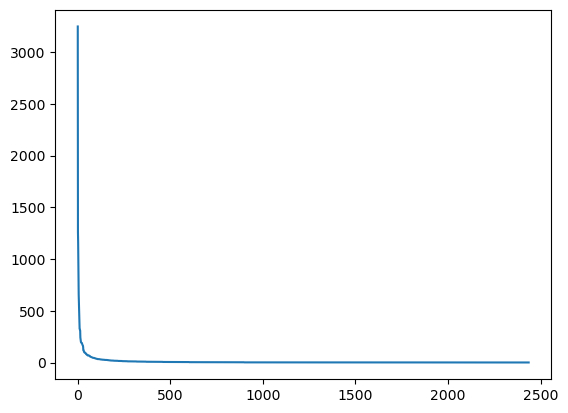

In [15]:
# Zipf's law
freq['token_freq'].plot()

그런데 자주 나오는 단어 중 문장 부호나 품사, 접속사 등의 기능어는 문서의 내용에 직접적인 영향을 미치지 않는다.

이 실습에서는 키워드 위주로 볼 수 있도록, 품사가 일반명사(NN)인 단어로 대상을 한정할 것이다.

이 경우에도 지프의 법칙이 여전히 성립한다.

<Axes: >

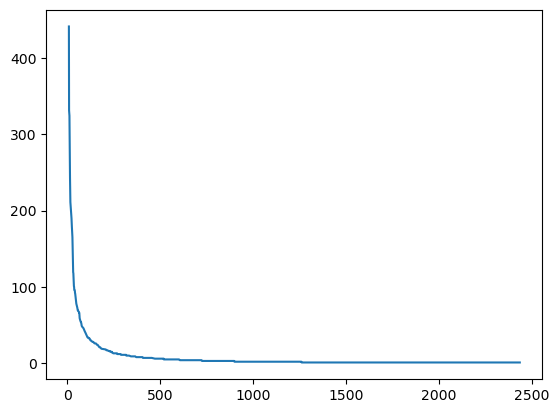

In [16]:
# 특정한 품사에 한정해도 지프의 법칙이 성립한다.
freq[freq['pos'] == 'NN']['token_freq'].plot()

### 문서 빈도(document frequency)

동요 코퍼스에서 문서 빈도를 구한 방법을 활용하여 `'doc_freq'` 열로 저장한다.

In [17]:
def get_df(term, term_freq=corpus['term_freq']):
    return sum([1 for tf_doc in term_freq if tf_doc[term]])

freq['doc_freq'] = freq.apply(lambda row: get_df(row['term']), axis=1)
freq

,term,token_freq,word,pos,doc_freq
0,"(,, ,)",3248,",",",",466
1,"(and, CC)",1262,and,CC,452
2,"(the, DT)",1165,the,DT,342
3,"(., .)",976,.,.,494
4,"(with, IN)",748,with,IN,355
...,...,...,...,...,...
2432,"(thrush, NN)",1,thrush,NN,1
2433,"(tying, VBG)",1,tying,VBG,1
2434,"(string, NN)",1,string,NN,1
2435,"(consisting, NN)",1,consisting,NN,1


토큰 빈도와 문서 빈도의 관계 또한 그림으로 그려보자.

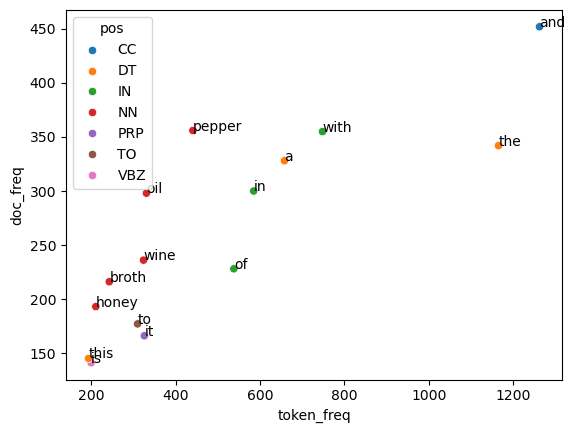

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

freq15 = freq[freq['word'].str.match(r'^[A-Za-z]+$')].iloc[:15]
sns.scatterplot(x='token_freq', y='doc_freq', hue='pos', data=freq15)

for _, (w, x, y) in freq15[['word', 'token_freq', 'doc_freq']].iterrows():
    ax.annotate(w, (x, y))

### 권별 비교: 절대 빈도

지금까지 사용한 토큰 빈도는 _De re coquinaria_ 전체에서 계산한 것이다.

그런데 _De re coquinaria_ 문헌은 총 10권과 부록으로 이루어져 있다.

I권부터 X권까지의 내용이 어떻게 다른지 알아보기 위해 각 권별로 토큰 빈도를 계산해서 비교해 보자.

`pd.DafaFrame.groupby()` 메소드를 사용하여 데이터를 각 권별로 분할한다.

이 분할된 데이터에서 `pd.Series.sum()` 메소드를 적용하면 단어 빈도 카운터를 권별 토큰 빈도로 합칠 수 있다.

In [19]:
book_counters = corpus.groupby(['book', 'book_title'])['term_freq'].sum()
book_counters

book  book_title                  
      SUMMARY OF DISHES               {('arrange', 'NN'): 4, ('different', 'JJ'): 1,...
I     THE CAREFUL EXPERIENCED COOK    {('the', 'DT'): 65, ('composition', 'NN'): 1, ...
II    MINCES                          {('there', 'EX'): 2, ('are', 'VBP'): 9, ('many...
III   THE GARDENER                    {('to', 'TO'): 24, ('keep', 'VB'): 1, ('all', ...
IV    MISCELLANEA                     {('pepper', 'NN'): 73, (',', ','): 473, ('fres...
IX    SEAFOOD                         {('chopped', 'JJ'): 2, ('scallions', 'NNS'): 1...
V     LEGUMES                         {('julian', 'JJ'): 1, ('pulses', 'NNS'): 1, ('...
VI    FOWL                            {('[', 'VB'): 3, ('a', 'DT'): 62, ('stock', 'N...
VII   SUMPTUOUS DISHES                {('sterile', 'JJ'): 1, ('sow', 'NN'): 4, (''s'...
VIII  QUADRUPEDS                      {('it', 'PRP'): 53, ('is', 'VBZ'): 46, ('clean...
X     THE FISHERMAN                   {('use', 'NN'): 1, ('any', 'DT'): 1, ('kind', .

I권부터 X권까지를 로마 숫자 순서에 맞게 재배열한다.

In [27]:
roman = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', '']
new_index = sorted(book_counters.index, key=lambda ind: roman.index(ind[0]))
book_counters = book_counters.reindex(new_index)
book_counters

book  book_title                  
I     THE CAREFUL EXPERIENCED COOK    {('the', 'DT'): 65, ('composition', 'NN'): 1, ...
II    MINCES                          {('there', 'EX'): 2, ('are', 'VBP'): 9, ('many...
III   THE GARDENER                    {('to', 'TO'): 24, ('keep', 'VB'): 1, ('all', ...
IV    MISCELLANEA                     {('pepper', 'NN'): 73, (',', ','): 473, ('fres...
V     LEGUMES                         {('julian', 'JJ'): 1, ('pulses', 'NNS'): 1, ('...
VI    FOWL                            {('[', 'VB'): 3, ('a', 'DT'): 62, ('stock', 'N...
VII   SUMPTUOUS DISHES                {('sterile', 'JJ'): 1, ('sow', 'NN'): 4, (''s'...
VIII  QUADRUPEDS                      {('it', 'PRP'): 53, ('is', 'VBZ'): 46, ('clean...
IX    SEAFOOD                         {('chopped', 'JJ'): 2, ('scallions', 'NNS'): 1...
X     THE FISHERMAN                   {('use', 'NN'): 1, ('any', 'DT'): 1, ('kind', ...
      SUMMARY OF DISHES               {('arrange', 'NN'): 4, ('different', 'JJ'): 1,.

각 권에서 `'pepper'`가 몇 번 출현했는지는 아래와 같이 확인할 수 있다.

In [68]:
# absolute frequency
absolute = book_counters.apply(lambda x: x[('pepper', 'NN')]).rename('abs_freq')
absolute

book  book_title                  
I     THE CAREFUL EXPERIENCED COOK    12
II    MINCES                          23
III   THE GARDENER                    35
IV    MISCELLANEA                     73
V     LEGUMES                         21
VI    FOWL                            43
VII   SUMPTUOUS DISHES                62
VIII  QUADRUPEDS                      77
IX    SEAFOOD                         35
X     THE FISHERMAN                   33
      SUMMARY OF DISHES               27
Name: abs_freq, dtype: int64

### 상대 빈도(relative frequency)

`'PEPPER'`가 어느 권에서 가장 많이 쓰였는지를 셀 수 있게 되었다.

그런데 여기서 나온 토큰 빈도를 권별로 직접 비교하는 것은 적절하지 않다.

`'PEPPER'`의 비중이 실제로 높아서 많이 나왔는지, 아니면 특정 권의 분량이 많아서 `'PEPPER'`도 덩달아 많이 출현하게 된 것인지 구별할 수 없기 때문이다.

이 문제를 해결하기 위해, 특정 단어의 토큰 빈도를 전체 단어의 토큰 빈도의 합으로 나눈 상대 빈도를 사용할 수 있다.

\begin{align*}
\text{(absolute frequency)} & = \text{(token frequency)}\\
\text{(relative frequency)} & = \frac{\text{(token frequency)}}{\text{(sum of all token frequencies)}}\\
\end{align*}

상대 빈도를 사용하면 분량과 무관하게 각 권에서 `'PEPPER'`가 차지하는 비중을 알 수 있다.

In [71]:
# relative frequency
def get_relative_frequencies(book_counter):
    # collections.Counter -> list of tuples -> dict -> pd.Series
    book_counter = pd.Series(dict(book_counter.most_common()))
    
    # calculate relative frequency
    book_counter = book_counter / book_counter.sum()

    return dict(book_counter)

book_rel_freq = book_counters.apply(get_relative_frequencies)
book_rel_freq

book  book_title                  
I     THE CAREFUL EXPERIENCED COOK    {(',', ','): 0.06571146245059288, ('.', '.'): ...
II    MINCES                          {(',', ','): 0.07194244604316546, ('and', 'CC'...
III   THE GARDENER                    {(',', ','): 0.0849351810460438, ('and', 'CC')...
IV    MISCELLANEA                     {(',', ','): 0.09049167782666921, ('and', 'CC'...
V     LEGUMES                         {(',', ','): 0.09647979139504563, ('and', 'CC'...
VI    FOWL                            {(',', ','): 0.13338856669428334, ('the', 'DT'...
VII   SUMPTUOUS DISHES                {(',', ','): 0.11740166865315853, ('and', 'CC'...
VIII  QUADRUPEDS                      {(',', ','): 0.14214641080312723, ('the', 'DT'...
IX    SEAFOOD                         {(',', ','): 0.17433234421364985, ('and', 'CC'...
X     THE FISHERMAN                   {(',', ','): 0.2706185567010309, ('.', '.'): 0...
      SUMMARY OF DISHES               {(',', ','): 0.12193951032165147, ('the', 'DT'.

`'PEPPER'`의 권별 절대 빈도와 상대 빈도를 비교해 보자.

예를 들어 절대 빈도의 경우 III권(35)보다 IV권(73)이 두 배 이상 크지만,

상대 빈도로 환산하면 III권(1천 단어당 15.65)이 IV권(13.97)보다 더 크다.

즉, 후추가 차지하는 비중이 III권에서 더 높음을 수 있다.

In [72]:
# relative frequency
relative = book_rel_freq.apply(lambda x: x[('pepper', 'NN')]).rename('rel_freq') * 1000
pd.concat([absolute, relative], axis=1)

,,abs_freq,rel_freq
book,book_title,,
I,THE CAREFUL EXPERIENCED COOK,12,5.928854
II,MINCES,23,15.042511
III,THE GARDENER,35,15.645954
IV,MISCELLANEA,73,13.965946
V,LEGUMES,21,9.126467
VI,FOWL,43,17.812759
VII,SUMPTUOUS DISHES,62,18.474374
VIII,QUADRUPEDS,77,18.242123
IX,SEAFOOD,35,25.964392


### 권별 비교: 상대 빈도

마지막으로 권별로 상대 빈도가 가장 높은 일반명사(`NN`) 10개를 뽑아서 어떤 차이가 있는지 살펴보자.

In [73]:
# occurrence per 1,000 words
def get_permil(x):
    return int(x * 1000)

# get 10 most frequent nouns
def get_topn_nn(rel_dict, topn=10):
    keys_sorted = sorted(rel_dict, key=lambda key: -rel_dict[key])
    keys = [(word, pos) for (word, pos) in keys_sorted if word.isalpha() and (pos=='NN')][:topn]
    word_relfreq_list = [(key[0], get_permil(rel_dict[key])) for key in keys]
    return pd.Series(dict(enumerate(word_relfreq_list, start=1)))

book_rel_freq.apply(get_topn_nn)

,,1,2,3,4,5,6,7,8,9,10
book,book_title,,,,,,,,,,
I,THE CAREFUL EXPERIENCED COOK,"(honey, 15)","(wine, 9)","(vinegar, 7)","(pepper, 5)","(vessel, 5)","(ozs, 5)","(tor, 4)","(place, 4)","(oz, 4)","(oil, 3)"
II,MINCES,"(pepper, 15)","(meat, 5)","(sausage, 5)","(stock, 5)","(forcemeat, 5)","(wine, 5)","(water, 5)","(broth, 4)","(lovage, 3)","(mortar, 3)"
III,THE GARDENER,"(oil, 16)","(pepper, 15)","(wine, 11)","(cumin, 9)","(water, 8)","(vinegar, 8)","(stock, 7)","(dish, 5)","(celery, 4)","(serve, 4)"
IV,MISCELLANEA,"(pepper, 13)","(oil, 10)","(wine, 10)","(broth, 6)","(dish, 6)","(sprinkle, 5)","(serve, 5)","(sauce, 5)","(pan, 4)","(lovage, 4)"
V,LEGUMES,"(oil, 10)","(wine, 9)","(pepper, 9)","(broth, 8)","(sauce, 6)","(coriander, 6)","(crush, 6)","(lovage, 6)","(taste, 5)","(fire, 5)"
VI,FOWL,"(pepper, 17)","(oil, 12)","(chicken, 10)","(broth, 9)","(vinegar, 9)","(sauce, 9)","(honey, 8)","(lovage, 8)","(wine, 7)","(seed, 6)"
VII,SUMPTUOUS DISHES,"(pepper, 18)","(oil, 14)","(wine, 12)","(honey, 11)","(broth, 8)","(sauce, 6)","(lovage, 5)","(serve, 5)","(vinegar, 5)","(salt, 4)"
VIII,QUADRUPEDS,"(pepper, 18)","(wine, 14)","(oil, 12)","(broth, 11)","(lovage, 7)","(sauce, 7)","(honey, 6)","(seed, 6)","(pig, 6)","(vinegar, 5)"
IX,SEAFOOD,"(pepper, 25)","(oil, 17)","(wine, 17)","(honey, 14)","(broth, 12)","(lovage, 10)","(vinegar, 10)","(cumin, 9)","(mint, 9)","(rue, 8)"


다양한 차이를 발견할 수 있다.

+ II권의 경우 `'meat'`, `'sausage'` 등이 자주 쓰였는데, 다른 권에서는 이 단어들이 순위권에 없다.
+ 대부분의 경우 `'pepper'`가 가장 자주 등장하지만, 채소 요리를 다루는 III권과 콩 요리를 다루는 V권의 경우 `'OIL'`의 비중이 더 높다.
+ `'wine'`의 경우 VIII권의 육류에서 2위, IX권의 해산물에서 2위를 차지했지만 VI권의 가금류에서는 9위로 순위가 낮다.